<a href="https://colab.research.google.com/github/Luke-Williams-01/Luke-Williams-01/blob/main/ICRARproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import simps
from scipy import stats

In [2]:
! wget -q https://xgass.icrar.org/assets/data/xGASS_representative_sample.ascii

In [3]:
# Loading the xGASS dataset with specific columns selected
xGASStb= np.loadtxt('xGASS_representative_sample.ascii', dtype = 'float', usecols=[8,10,16,18,1,23,24,26,27,31,32], unpack= 'true')
# Loading the specfic columns with flags as separate arrays
HIsrc, HI_FLAG = np.loadtxt('xGASS_representative_sample.ascii', dtype = 'float', usecols=[26,27], unpack= 'true')
# Removing data with an index that falls into the conditions HI_FLAG >1 or HI_FLAG <90
xGASSRd = np.delete(xGASStb, np.where((HI_FLAG >1) & (HI_FLAG < 90)), axis = 1)
xGASST = xGASSRd.T

# Assigning the 1d arrays to the correct column of data
zSDSS = xGASST[:,0]
lgMstar = xGASST[:,1]
petro90r = xGASST[:,2]
lgmust = xGASST[:,3]
lgSFR_tot_median = xGASST[:,4]
SFR_best = xGASST[:,5]
SFRerr_best = xGASST[:,6]
HIsrc = xGASST[:,7]
HI_FLAG = xGASST[:,8]
lgMHI = xGASST[:,9]
lgGF = xGASST[:,10]

In [4]:
# Testing to ensure the correct arrays are filled with the correct values
print(zSDSS)
print(lgMstar)
print(petro90r)
print(lgmust)
print(lgSFR_tot_median)
print(SFR_best)
print(SFRerr_best)
print(HIsrc)
print(HI_FLAG)
print(lgMHI)
print(lgGF)

[0.03618 0.03573 0.04201 ... 0.04656 0.02704 0.03797]
[10.709 10.539 10.625 ... 10.946 10.334 10.25 ]
[10.51  9.96  7.01 ... 13.09  6.66 14.09]
[9.18 9.05 9.32 ... 9.08 9.37 8.12]
[101866. 101874. 101876. ... 332851. 332201. 332883.]
[0.82985944 0.03869768 0.0620131  ... 2.902701   0.03280856 0.93741816]
[0.         0.07982571 0.15414698 ... 0.42542186 0.         0.28900966]
[3. 4. 3. ... 4. 4. 3.]
[ 1. 99.  1. ... 99. 99.  1.]
[9.603 8.74  9.244 ... 9.183 8.664 9.517]
[-1.106 -1.799 -1.381 ... -1.763 -1.67  -0.733]


In [5]:
# Finding all the rows in the xGASS data with HIsrc < 4, if HIsrc = 4, no detection of HI
HIndet = np.where(HIsrc >= 4)

lgMstar1 = np.delete(lgMstar, (HIndet))
lgmust1 = np.delete(lgmust, (HIndet))
lgSFR_tot_median1 = np.delete(lgSFR_tot_median, (HIndet))
SFR_best1 = np.delete(SFR_best, (HIndet))
SFRerr_best1 = np.delete(SFRerr_best, (HIndet))
HIsrc1 = np.delete(HIsrc, (HIndet))
HI_FLAG1 = np.delete(HI_FLAG, (HIndet))
lgMHI1 = np.delete(lgMHI, (HIndet))
lgGF1 = np.delete(lgGF, (HIndet))

HIdet = np.where(HIsrc < 4)

lgMstar2 = np.delete(lgMstar, (HIdet))
lgmust2 = np.delete(lgmust, (HIdet))
lgSFR_tot_median2 = np.delete(lgSFR_tot_median, (HIdet))
SFR_best2 = np.delete(SFR_best, (HIdet))
SFRerr_best2 = np.delete(SFRerr_best, (HIdet))
HIsrc2 = np.delete(HIsrc, (HIdet))
HI_FLAG2 = np.delete(HI_FLAG, (HIdet))
lgMHI2 = np.delete(lgMHI, (HIdet))
lgGF2 = np.delete(lgGF, (HIdet))

print(len(lgMstar1))
print(len(lgMstar2))

691
375


(array([10,  5,  8, 11,  8,  8, 10,  9,  9,  6,  6,  5,  6,  2,  4,  9,  4,
        8,  5,  4,  6,  8,  6,  4,  2,  5,  7,  6,  4,  4,  5,  7,  5,  3,
        9,  7,  5,  9,  9,  3,  7,  9, 10, 14, 15, 11, 13, 10, 15, 11,  8,
        8, 13, 11,  8,  6,  9,  6,  6,  6,  9,  6,  5, 12, 13,  7,  5,  9,
        8, 12,  9, 11,  8,  8, 11,  7,  4,  9,  8,  3,  7,  4,  7,  8, 14,
        6,  6,  5,  5,  7,  3,  1,  0,  3,  0,  0,  2,  0,  2]), array([ 9.001083  ,  9.02531448,  9.04954597,  9.07377745,  9.09800894,
        9.12224042,  9.14647191,  9.17070339,  9.19493488,  9.21916636,
        9.24339785,  9.26762933,  9.29186082,  9.3160923 ,  9.34032379,
        9.36455527,  9.38878676,  9.41301824,  9.43724973,  9.46148121,
        9.4857127 ,  9.50994418,  9.53417567,  9.55840715,  9.58263864,
        9.60687012,  9.63110161,  9.65533309,  9.67956458,  9.70379606,
        9.72802755,  9.75225903,  9.77649052,  9.800722  ,  9.82495348,
        9.84918497,  9.87341645,  9.89764794,  9.921879

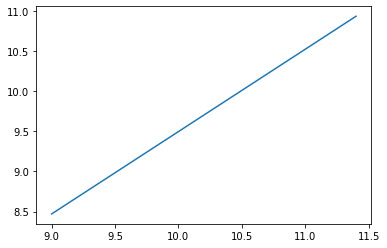

In [9]:
# Finding the running median of the HI detections

'''
H, x_edges, y_edges = np.histogram2d(lgMstar1, lgMHI1, bins=99)
xedge = np.histogram(lgMstar1, bins = 99)
print(xedge)
# Finding the median absolute deviations
MAD = stats.median_absolute_deviation(x_edges)
print(MAD)

b = np.split(lgMHI, 100, axis=0)
print(b)

bigg = np.column_stack((lgMHI, lgMstar))
new_output = np.median(bigg, axis=0)
new_output2= np.median(bigg,axis=1)
print(new_output)
print(new_output2)
a = np.histogram2d(lgMstar, lgMHI, bins = 100)
print(a)

bigg = np.column_stack((y_edges, x_edges))
medlgMHI = np.median(bigg, axis=1)
print(medlgMHI)
plt.plot(x_edges, medlgMHI)

#binMHI = np.digitize(lgMHI1, bins =)
#print(binMHI)
'''

0.253
-1.6465
[1.73198336 2.71355944 1.4239214  ... 2.75512081 1.89662831 2.44123728]


<Figure size 432x288 with 0 Axes>

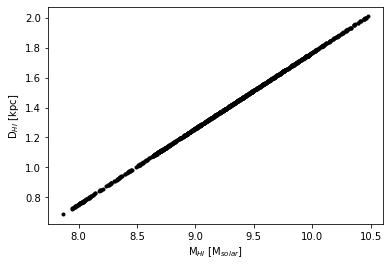

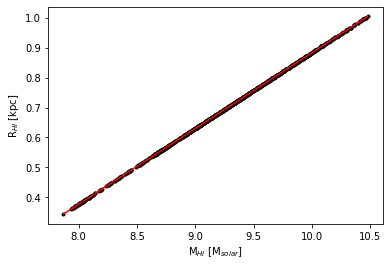

<Figure size 432x288 with 0 Axes>

In [7]:
# DHI- MHI relation
lgDHI = 0.506*lgMHI - 3.293
lgRHI = 0.5*lgDHI
RHI = 10**lgRHI

# Plotting the D(HI)-M(HI) relation
plt.figure()
plt.plot(lgMHI, lgDHI, 'k.')
plt.ylabel('D$_{HI}$ [kpc]')
plt.xlabel('M$_{HI}$ [M$_{solar}$]');

# Plotting the R(HI)-M(HI) relation
plt.figure()
plt.plot(lgMHI, lgRHI, 'k.')
plt.ylabel('R$_{HI}$ [kpc]')
plt.xlabel('M$_{HI}$ [M$_{solar}$]');


# Fitting a line to the RHI-MHI relation
x = lgMHI
p = np.linspace(min(lgMHI), max(lgMHI), 1000)
y = lgRHI
def linfun(x, m, c): 
    return m*x + c
p0 = np.array([])
popt, pcov = curve_fit(linfun, x, y)
m= popt[0]
c= popt[1]

# plot fit
plt.plot(p, linfun(p, *popt), 'r');
grad = popt[0]
print(grad)
intercept = popt[1]
print(intercept)

# Finding the median HI profile, plotting r90/RHI against log (ΣHI)
r90RHI = petro90r/RHI
print(r90RHI)

# Plotting
plt.figure()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log10
  


"\nplt.subplot(223)\nplt.plot(,, 'k.', label= 'HI detection')\nplt.plot(,, 'r.', label= 'No HI detection')\nplt.xlabel('log(M*) [M$_{solar}$]')\nplt.ylabel('log(M$_{HI}$)')\nplt.legend(loc='best')\n\nplt.subplot(224)\nplt.plot(,, 'k.', label= 'HI detection')\nplt.plot(,, 'r.', label= 'No HI detection')\nplt.xlabel('log(SFR) [M$_{solar}$ yr$^{-1}$]')\nplt.ylabel('log(M$_{HI}$)')\nplt.legend(loc='best');\n"

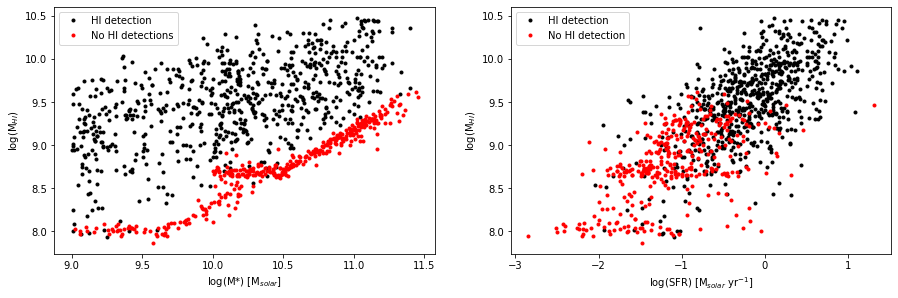

In [8]:
# Global HI mass and HI mass contained in the optical regions
plt.figure(figsize = (15,10))

plt.subplot(221)
plt.plot(lgMstar1, lgMHI1, 'k.', label= 'HI detection')
plt.plot(lgMstar2, lgMHI2, 'r.', label= 'No HI detections')
#plt.plot(lgMstar1, medlgMHI, 'b.')
plt.xlabel('log(M*) [M$_{solar}$]')
plt.ylabel('log(M$_{HI}$)')
plt.legend(loc='best')

plt.subplot(222)
plt.plot(np.log10(SFR_best1), lgMHI1, 'k.', label= 'HI detection')
plt.plot(np.log10(SFR_best2), lgMHI2, 'r.', label= 'No HI detection')
plt.xlabel('log(SFR) [M$_{solar}$ yr$^{-1}$]')
plt.ylabel('log(M$_{HI}$)')
plt.legend(loc='best')
'''
plt.subplot(223)
plt.plot(,, 'k.', label= 'HI detection')
plt.plot(,, 'r.', label= 'No HI detection')
plt.xlabel('log(M*) [M$_{solar}$]')
plt.ylabel('log(M$_{HI}$)')
plt.legend(loc='best')

plt.subplot(224)
plt.plot(,, 'k.', label= 'HI detection')
plt.plot(,, 'r.', label= 'No HI detection')
plt.xlabel('log(SFR) [M$_{solar}$ yr$^{-1}$]')
plt.ylabel('log(M$_{HI}$)')
plt.legend(loc='best');
'''